<a href="https://colab.research.google.com/github/Abo85Mustafa/markov_chain/blob/master/SpatialMarkov_AirPollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#giddy.markov.Spatial_Markov
#https://pysal.readthedocs.io/en/dev/users/tutorials/dynamics.html#spatial-dynamics
#https://giddy.readthedocs.io/en/latest/generated/giddy.markov.Spatial_Markov.html
#pip install pysal
!pip install -U setuptools
#!pip install -U pysal

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (47.1.1)


In [ ]:
pip install -U pysal

In [ ]:
env LDFLAGS="-I/usr/local/opt/openssl/include -L/usr/local/opt/openssl/lib" pip install psycopg2

env: LDFLAGS="-I/usr/local/opt/openssl/include -L/usr/local/opt/openssl/lib" pip install psycopg2


In [ ]:
#Installing PySAL via Conda
#conda install --channel conda-forge pysal
collab install --channel collab-forge pysal


In [ ]:
pip install giddy


  Using cached https://files.pythonhosted.org/packages/5c/71/f7fc2b41e36b2a06bac30937435d2dedd125f74f3157213ec121ff52d961/giddy-2.3.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/f1/c2190bc3a7ef9c83ce0b060b927763352bfc0a55ccea8bb5fcd8975de347/esda-2.2.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/6f/00/bf40b380e9064222868c93ed51d81dd14b1266b16dd5a54e53aaed12caf2/libpysal-4.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/72/15/7649ba1f5ad5adc78efbda71d5f1dd15f0edf4a0dead41ba048b7d7e5335/quantecon-0.4.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/b5/6b54f40901d89f2ce30cf2d8110dd57658db3e95db79baba6706d7588691/mapclassify-2.2.0.tar.gz
  Created wheel for esda: filename=esda-2.2.1-cp36-none-any.whl size=57029 sha256=6f11c293333b82402b81dd63d4dea7f4396e497fc4d3ad88f65f95e5b569edec
  Stored in directory: /root/.cache/pip/wheels/12/83/ca/6f2cf40e4cab188802538c063442168a737a2323c7a5a063ec
  Created

In [ ]:
!pip install numpy

In [ ]:
!pip install --upgrade numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.5)


In [ ]:
!pip install pandas

In [ ]:
import giddy
import numpy as np
import pandas as pd
import libpysal as ps
#from giddy.markov import classic_Markov
from giddy.markov import Spatial_Markov

/usr/local/lib/python3.6/dist-packages/libpysal/weights/util.py:20: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Last37API.csv to Last37API.csv


In [ ]:
df = pd.read_csv("Last37API.csv")
df.head()

,Name,STATE_FIPS,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096
0,Johor1,1,50,40,44,46.0,45.0,46.0,43,40,42,42.0,41,39.0,34,43.0,63.0,82,57.0,47.0,57.0,52.0,49.0,51,44,38.0,44.0,38,34,29,27.0,32,25.0,31.0,34.0,33,45.0,50,39.0,36,...,37,40.0,43.0,46.0,41,41.0,43.0,50.0,54.0,51,50.0,51,50,90,49,37,32,38.0,42.0,47,45.0,39.0,43,35,36,38.0,40.0,28,32,31.0,32.0,36.0,35,43,43.0,34,31,30,32,41
1,Terengganu1,2,43,51,55,54.0,54.0,54.0,52,53,53,47.0,51,51.0,54,46.0,51.0,60,60.0,60.0,64.0,63.0,49.0,51,50,52.0,54.0,57,59,52,37.0,41,51.0,64.0,65.0,61,62.0,61,49.0,56,...,34,49.0,33.0,36.0,33,35.0,42.0,38.0,50.0,41,39.0,35,39,39,49,53,51,52.0,50.0,48,45.0,41.0,39,46,41,45.0,47.0,42,49,51.0,50.0,51.0,40,42,44.0,50,52,53,51,51
2,Pulau Pinang1,3,37,47,63,54.0,49.0,51.0,42,46,41,42.0,44,46.0,36,41.0,45.0,54,53.0,46.0,45.0,50.0,40.0,53,40,41.0,45.0,41,62,48,47.0,48,76.0,50.0,49.0,40,39.0,46,51.0,47,...,39,55.0,60.0,42.0,53,36.0,31.0,59.0,38.0,50,45.0,42,87,61,40,40,37,65.0,56.0,42,46.0,56.0,48,30,36,42.0,28.0,38,37,29.0,27.0,30.0,29,32,30.0,58,34,27,52,57
3,"Bukit Rambai, Melaka1",6,49,51,55,55.0,56.0,56.0,56,53,55,57.0,53,57.0,55,67.0,61.0,51,70.0,56.0,57.0,55.0,74.0,47,39,57.0,59.0,53,56,54,54.0,55,53.0,51.0,51.0,54,54.0,56,61.0,54,...,62,60.0,47.0,52.0,48,55.0,51.0,47.0,61.0,51,51.0,53,48,66,61,64,48,61.0,62.0,66,63.0,59.0,51,46,52,57.0,56.0,53,58,51.0,38.0,33.0,42,42,39.0,41,36,35,51,56
4,Pahang1,7,26,24,25,25.0,25.0,24.0,30,27,25,22.0,20,27.0,24,22.0,25.0,34,36.0,36.0,40.0,36.0,34.0,17,18,23.0,25.0,25,22,19,19.0,21,25.0,19.0,23.0,25,21.0,25,21.0,25,...,26,30.0,32.0,32.0,34,34.0,34.0,34.0,40.0,45,42.0,41,41,36,34,30,28,30.0,42.0,47,40.0,33.0,32,29,26,25.0,30.0,43,42,38.0,34.0,31.0,26,25,25.0,25,27,25,34,39


In [ ]:
df = pd.read_csv("Last-37-API-data-MAX.csv")
df.head()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving numbers_Last37API -.csv to numbers_Last37API -.csv


In [ ]:
df = pd.read_csv("numbers_Last37API -.csv")
df.head()

,Name,STATE_FIPS,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096
0,Johor1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,2,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Terengganu1,2,1,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,1,2,1,2,2,2,2,2,1,1,2,2,2,2,2,2,1,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,2,2,2,2
2,Pulau Pinang1,3,1,1,2,2,1,2,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,2,1,...,1,2,2,1,2,1,1,2,1,1,1,1,2,2,1,1,1,2,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,2
3,"Bukit Rambai, Melaka1",6,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,1,2,2,1,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2
4,Pahang1,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Read the air pollution data for 37 regions (observation stations)

In [ ]:
df = pd.read_csv("Last37API.csv")
df.tail()

,Name,STATE_FIPS,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096
32,"Port Dickson, Nege.Sembilan",56,56,79,43,43.0,50.0,52.0,66,50,46,51.0,53,81.0,61,56.0,52.0,66,81.0,58.0,48.0,51.0,70.0,50,43,83.0,92.0,56,61,85,83.0,53,53.0,45.0,56.0,45,54.0,63,95.0,55,...,65,52.0,54.0,53.0,30,53.0,67.0,38.0,36.0,29,39.0,87,37,97,51,89,35,48.0,81.0,78,99.0,66.0,71,62,72,33.0,66.0,45,61,54.0,56.0,27.0,59,30,32.0,49,74,29,35,48
33,"Kota Tinggi, Johor",57,33,40,44,47.0,48.0,50.0,47,35,46,46.0,46,46.0,40,43.0,44.0,51,48.0,54.0,52.0,46.0,46.0,40,40,42.0,47.0,50,52,45,36.0,34,35.0,40.0,41.0,38,44.0,48,45.0,40,...,32,29.0,27.0,25.0,27,26.0,32.0,31.0,77.0,76,87.0,56,44,82,38,39,35,39.0,46.0,49,48.0,46.0,39,35,36,34.0,40.0,39,46,40.0,37.0,39.0,37,57,39.0,33,31,32,40,47
34,Kuala Lumpur,58,47,66,37,28.0,30.0,34.0,49,41,41,39.0,45,31.0,36,89.0,73.0,80,66.0,86.0,78.0,80.0,57.0,50,54,57.0,77.0,40,78,49,52.0,82,45.0,27.0,61.0,55,41.0,33,58.0,84,...,60,69.0,24.0,29.0,40,57.0,67.0,74.0,50.0,49,137.0,48,46,82,75,41,54,45.0,82.0,56,57.0,78.0,72,47,51,49.0,52.0,51,60,62.0,40.0,33.0,52,51,40.0,43,35,29,36,52
35,Kelantan2,59,36,50,54,59.0,61.0,62.0,63,60,58,57.0,59,59.0,53,50.0,48.0,51,45.0,41.0,47.0,50.0,49.0,54,57,61.0,61.0,60,60,54,48.0,50,54.0,51.0,52.0,50,58.0,59,58.0,59,...,28,28.0,33.0,32.0,36,34.0,39.0,29.0,38.0,50,45.0,41,31,32,31,30,26,40.0,51.0,53,54.0,51.0,43,21,16,15.0,14.0,18,18,21.0,26.0,34.0,32,20,21.0,22,20,19,20,23
36,"Banting , Selangor",60,44,55,52,35.0,47.0,68.0,68,57,64,59.0,53,42.0,80,51.0,53.0,57,56.0,52.0,46.0,51.0,57.0,38,36,54.0,72.0,61,58,91,81.0,52,72.0,41.0,43.0,46,50.0,63,70.0,52,...,52,55.0,64.0,53.0,43,95.0,104.0,69.0,48.0,40,61.0,55,43,66,69,64,45,80.0,111.0,54,99.0,90.0,61,62,76,38.0,62.0,50,53,50.0,54.0,37.0,61,52,34.0,43,61,32,39,67


## Obtain the air pollution time series for 37 regions

In [ ]:
y = df[list(map(str, range(1,1097)))].values
y.shape

(37, 1096)

In [ ]:
y

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 2, 2, ..., 2, 2, 2],
       [1, 1, 2, ..., 1, 2, 2],
       ...,
       [1, 2, 1, ..., 1, 1, 2],
       [1, 1, 2, ..., 1, 1, 1],
       [1, 2, 2, ..., 1, 1, 2]])

In [ ]:
!apt install pysal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package pysal


In [ ]:
pip install pysal

In [ ]:
#Classic Markov
import pysal
import pandas as pd
m = pysal.Markov(y)
m.transitions

In [ ]:
import giddy
m = giddy.markov.Markov(y)

The Markov Chain is irreducible and is composed by:
1 Recurrent class (indices):
[0 1 2 3 4]
0 Transient classes.
The Markov Chain has 0 absorbing states.


In [ ]:
print(m.classes)


[1 2 3 4 5]


In [ ]:
print(len(m.classes))


5


In [ ]:
print(m.transitions)


[[1.4723e+04 4.0470e+03 3.6000e+01 0.0000e+00 0.0000e+00]
 [4.0530e+03 1.6369e+04 4.5000e+02 1.0000e+00 0.0000e+00]
 [1.6000e+01 4.6800e+02 2.9000e+02 1.2000e+01 6.0000e+00]
 [0.0000e+00 1.0000e+00 1.0000e+01 6.0000e+00 5.0000e+00]
 [0.0000e+00 0.0000e+00 8.0000e+00 3.0000e+00 1.1000e+01]]


In [ ]:

# import the important module in python 
import numpy as np 
           
# make matrix with numpy 
gfg2 = m.transitions
geeks2 = gfg2.round(6) 
     
print(geeks2) 

[[1.4723e+04 4.0470e+03 3.6000e+01 0.0000e+00 0.0000e+00]
 [4.0530e+03 1.6369e+04 4.5000e+02 1.0000e+00 0.0000e+00]
 [1.6000e+01 4.6800e+02 2.9000e+02 1.2000e+01 6.0000e+00]
 [0.0000e+00 1.0000e+00 1.0000e+01 6.0000e+00 5.0000e+00]
 [0.0000e+00 0.0000e+00 8.0000e+00 3.0000e+00 1.1000e+01]]


In [ ]:

# import the important module in python 
import numpy as np 
           
# make matrix with numpy 
gfg = m.p
geeks = gfg.round(4) 
     
print(geeks) 

[[0.7829 0.2152 0.0019 0.     0.    ]
 [0.1942 0.7842 0.0216 0.     0.    ]
 [0.0202 0.5909 0.3662 0.0152 0.0076]
 [0.     0.0455 0.4545 0.2727 0.2273]
 [0.     0.     0.3636 0.1364 0.5   ]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Global')

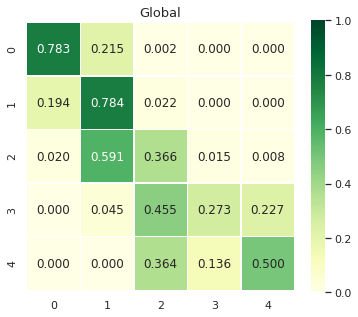

In [ ]:
from esda.moran import Moran
import matplotlib.pyplot as plt
#we use seaborn to create a heatmap (`pip install seaborn` to install seaborn if you do not have it)
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize = (6,5))
im = sns.heatmap(m.p, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True,  cmap="YlGn",fmt='.3f')
ax.set_title("Global",fontsize=13) 


In [ ]:
m.steady_state  # steady state distribution


array([0.46328641, 0.51596837, 0.01965356, 0.00054579, 0.00054587])

In [ ]:
print(giddy.ergodic.fmpt(m.p))


[[2.15849198e+00 4.62243217e+00 8.51421924e+01 2.82618992e+03
  4.08378456e+03]
 [5.32231739e+00 1.93810329e+00 8.12526739e+01 2.82225051e+03
  4.07987236e+03]
 [6.86615670e+00 1.87195975e+00 5.08813654e+01 2.74665675e+03
  4.00119155e+03]
 [8.94701240e+00 3.93039728e+00 7.73776033e+00 1.83221185e+03
  2.75711174e+03]
 [9.43366280e+00 4.43335180e+00 4.11029827e+00 1.99956854e+03
  1.83194853e+03]]


#### The following code is to transform the spatial weight file to use the indices of regions (starting with 0 and ending with 36) instead of  STATE_FIPS.

Store the resulted spatial weights data into 37_weight.gal

In [ ]:

#dict_fips_index = dict(zip(map(str,df["STATE_FIPS"].values), range(len(df))))

# import csv
# f_fips = open("37with_-ID_order_test.txt", "r")
# i = 0
# with open('37_weight.gal', 'w', newline='') as f_index:
#     writer = csv.writer(f_index, delimiter=" ")
#     writer.writerow([37])
#     for line in f_fips:
#         line = line.strip("\t")
#         line_index = []
#         if i%2:
#             for fip in line.split():
#                 line_index.append(dict_fips_index[fip])
#         else:
#             id_num = line.split()
#             line_index.append(dict_fips_index[id_num[0]])
#             line_index.append(id_num[1])
            
#         i = i + 1
#         writer.writerow(line_index)
# f_fips.close()
# f_index.close()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 37_weight.gal to 37_weight.gal


In [ ]:
w = ps.io.open("37_weight.gal").read()
w.transform = 'r'
w.neighbors

{'0': ['13', '33'],
 '1': ['4', '10', '16'],
 '10': ['9', '4', '1'],
 '11': ['34', '31', '30', '17'],
 '12': ['35', '22', '21', '14', '6', '2'],
 '13': ['33', '25', '9', '0'],
 '14': ['35', '27', '23', '21', '12', '6', '5', '2'],
 '15': ['35', '22', '20'],
 '16': ['20', '4', '1'],
 '17': ['8', '11', '29', '30', '34'],
 '18': ['19', '21', '22'],
 '19': ['18', '22'],
 '2': ['6', '12', '14', '21'],
 '20': ['4', '15', '16', '35'],
 '21': ['2', '12', '14', '18', '22', '23'],
 '22': ['12', '15', '18', '19', '21', '35'],
 '23': ['14', '21', '26', '27', '29'],
 '24': ['3', '25', '28'],
 '25': ['9', '13', '24', '28'],
 '26': ['4', '5', '23', '27', '29', '34'],
 '27': ['5', '14', '23', '26'],
 '28': ['3', '4', '7', '9', '24', '25', '31', '32'],
 '29': ['8', '17', '23', '26', '34'],
 '3': ['24', '28', '32'],
 '30': ['7', '8', '11', '17', '31', '36'],
 '31': ['4', '7', '11', '28', '30', '34'],
 '32': ['3', '7', '8', '28', '36'],
 '33': ['0', '9', '13'],
 '34': ['4', '11', '17', '26', '29', '31'],


In [ ]:
pip install geopandas

  Using cached https://files.pythonhosted.org/packages/83/c5/3cf9cdc39a6f2552922f79915f36b45a95b71fd343cfc51170a5b6ddb6e8/geopandas-0.7.0-py2.py3-none-any.whl
     |████████████████████████████████| 10.9MB 4.1MB/s 
     |████████████████████████████████| 14.7MB 308kB/s 


In [ ]:
pip install matplotlib

In [ ]:
from libpysal.weights.contiguity import Queen
import libpysal
from libpysal import examples
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline


## Spatial Markov analysis

#### set the discretization cutoffs for air pollution data as well as the spatial lags

In [ ]:
cc = np.array([50,100,200,300])
cc

array([ 50, 100, 200, 300])

In [ ]:
##     giddy.markov.Spatial_Markov(self, y, w, k=4, permutations=0, fixed=False, variable_name=None)

sm = Spatial_Markov(y, w, cutoffs=cc, lag_cutoffs=cc, variable_name='Air Pollution')
sm

In [ ]:
sm.cutoffs

array([ 50., 100., 200., 300.])

In [ ]:
sm.lag_cutoffs

array([ 50., 100., 200., 300.])

In [ ]:
#  classsic Markov chain
##     giddy.markov.Markov(self, class_ids, classes=cc)

import giddy
m=giddy.markov.Markov(y)
m

In [ ]:
y

array([[50., 40., 44., ..., 30., 32., 41.],
       [43., 51., 55., ..., 53., 51., 51.],
       [37., 47., 63., ..., 27., 52., 57.],
       ...,
       [47., 66., 37., ..., 29., 36., 52.],
       [36., 50., 54., ..., 19., 20., 23.],
       [44., 55., 52., ..., 32., 39., 67.]])

In [ ]:
cc

array([ 50, 100, 200, 300])

In [ ]:
sm.transitions

array([[1.4723e+04, 4.0470e+03, 3.6000e+01, 0.0000e+00, 0.0000e+00],
       [4.0530e+03, 1.6369e+04, 4.5000e+02, 1.0000e+00, 0.0000e+00],
       [1.6000e+01, 4.6800e+02, 2.9000e+02, 1.2000e+01, 6.0000e+00],
       [0.0000e+00, 1.0000e+00, 1.0000e+01, 6.0000e+00, 5.0000e+00],
       [0.0000e+00, 0.0000e+00, 8.0000e+00, 3.0000e+00, 1.1000e+01]])

In [ ]:
sm.p

array([[7.82888440e-01, 2.15197277e-01, 1.91428268e-03, 0.00000000e+00,
        0.00000000e+00],
       [1.94174292e-01, 7.84218847e-01, 2.15589518e-02, 4.79087817e-05,
        0.00000000e+00],
       [2.02020202e-02, 5.90909091e-01, 3.66161616e-01, 1.51515152e-02,
        7.57575758e-03],
       [0.00000000e+00, 4.54545455e-02, 4.54545455e-01, 2.72727273e-01,
        2.27272727e-01],
       [0.00000000e+00, 0.00000000e+00, 3.63636364e-01, 1.36363636e-01,
        5.00000000e-01]])

In [ ]:
m.transitions

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
sm.summary()

--------------------------------------------------------------
              Spatial Markov Test: Air Pollution              
--------------------------------------------------------------
Number of classes: 5
Number of transitions: 40515
Number of regimes: 5
Regime names: LAG0, LAG1, LAG2, LAG3, LAG4
--------------------------------------------------------------
   Test                   LR                Chi-2
  Stat.              969.316             1355.926
    DOF                   36                   36
p-value                0.000                0.000
--------------------------------------------------------------
P(H0)           C0         C1         C2         C3         C4
     C0      0.783      0.215      0.002      0.000      0.000
     C1      0.194      0.784      0.022      0.000      0.000
     C2      0.020      0.591      0.366      0.015      0.008
     C3      0.000      0.045      0.455      0.273      0.227
     C4      0.000      0.000      0.364      0.136     

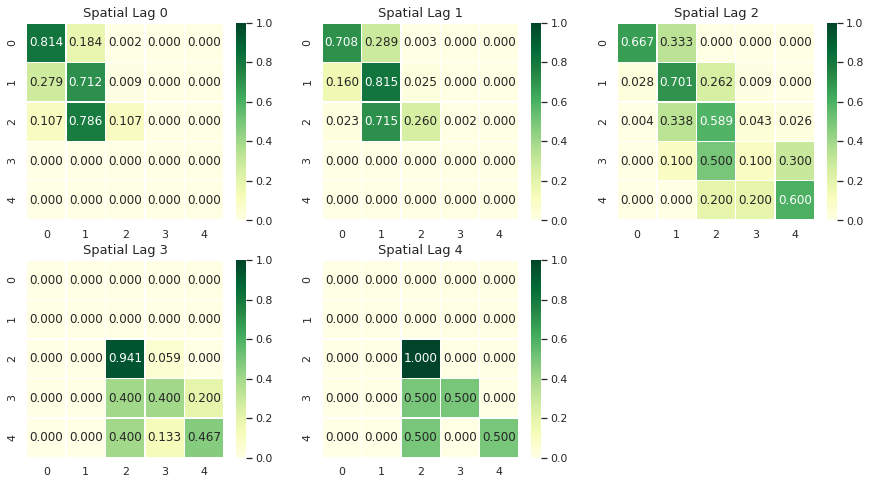

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (15,8)) 

for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if i==1 and j==2:
            ax.axis('off')
            continue
        p_temp = sm.P[i*3+j]
        im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
        ax.set_title("Spatial Lag %d"%(i*3+j),fontsize=13) 

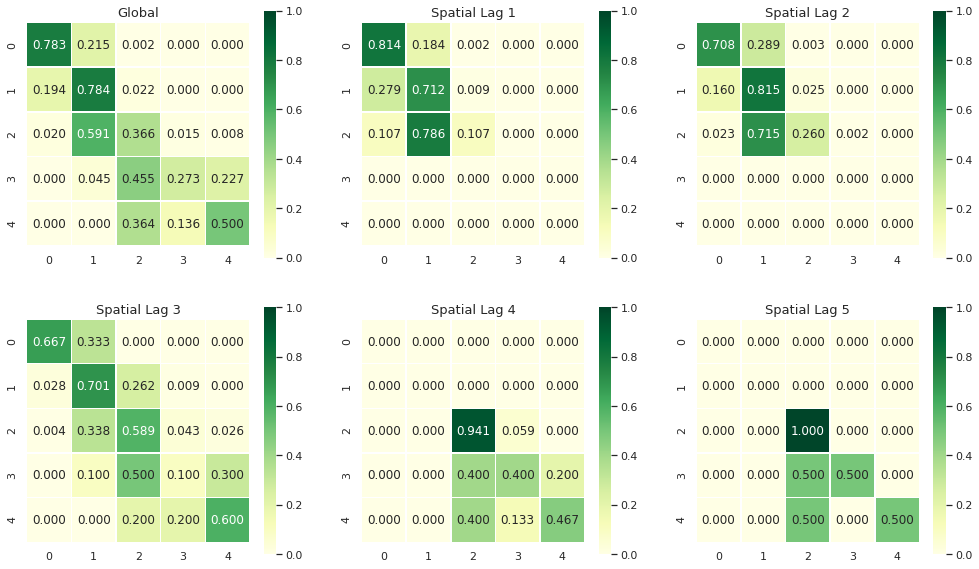

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (17,10)) 

for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if i==0 and j==0:
            im = sns.heatmap(sm.p, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
            ax.set_title("Global",fontsize=13) 
        else:
            p_temp = sm.P[i*3+j-1]
            im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
            ax.set_title("Spatial Lag %d"%(i*3+j),fontsize=13) 

In [ ]:
giddy.markov.Homogeneity_Results(sm.T).summary()
#giddy.markov.homogeneity(transition_matrices, regime_names=[], class_names=[], title='Markov Homogeneity Test')

--------------------------------------------------
             Markov Homogeneity Test              
--------------------------------------------------
Number of classes: 5
Number of transitions: 40515
Number of regimes: 5
Regime names: 0, 1, 2, 3, 4
--------------------------------------------------
   Test                   LR                Chi-2
  Stat.              969.316             1355.926
    DOF                   36                   36
p-value                0.000                0.000
--------------------------------------------------
P(H0)        0        1        2        3        4
    0    0.783    0.215    0.002    0.000    0.000
    1    0.194    0.784    0.022    0.000    0.000
    2    0.020    0.591    0.366    0.015    0.008
    3    0.000    0.045    0.455    0.273    0.227
    4    0.000    0.000    0.364    0.136    0.500
--------------------------------------------------
P(0)         0        1        2        3        4
    0    0.814    0.184    0.002    0.

In [ ]:
sm.T

array([[[1.0776e+04, 2.4360e+03, 2.1000e+01, 0.0000e+00, 0.0000e+00],
        [1.7090e+03, 4.3560e+03, 5.7000e+01, 0.0000e+00, 0.0000e+00],
        [3.0000e+00, 2.2000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

       [[3.9450e+03, 1.6100e+03, 1.5000e+01, 0.0000e+00, 0.0000e+00],
        [2.3410e+03, 1.1938e+04, 3.6500e+02, 0.0000e+00, 0.0000e+00],
        [1.2000e+01, 3.6800e+02, 1.3400e+02, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

       [[2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.0000e+00, 7.5000e+01, 2.8000e+01, 1.0000e+00, 0.0000e+00],
        [1.0000e+00, 7.8000e+01, 1.3600e+02, 1.0000e+01, 6.0000e+00],
        [0.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00],
        [0.0000e

In [ ]:
giddy.markov.LISA_Markov(y, w, permutations=0, significance_level=0.05, geoda_quads=False)


In [ ]:
lm = giddy.markov.LISA_Markov(pci.T, w)
print(lm.classes)

NameError: ignored

In [ ]:
print(lm.transitions)


In [ ]:
print(lm.p)


In [ ]:
print(lm.steady_state)


In [ ]:
print(giddy.ergodic.fmpt(lm.p))


In [ ]:
print(lm.chi_2)


In [ ]:
giddy.markov.kullback(sm.T)


{'Conditional homogeneity': 3910.515852995566,
 'Conditional homogeneity dof': 80,
 'Conditional homogeneity pvalue': 0.0}

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


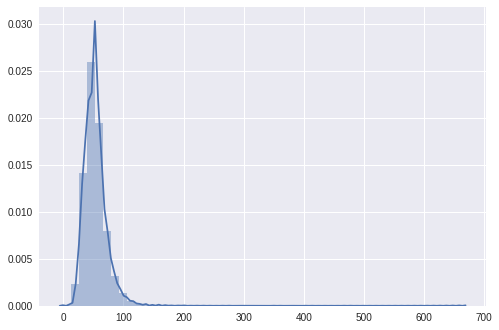

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y.flatten())

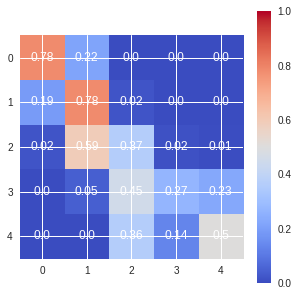

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
im = ax.imshow(sm.p,cmap = "coolwarm",vmin=0, vmax=1)
# Loop over data dimensions and create text annotations.
for i in range(len(sm.p)):
    for j in range(len(sm.p)):
        text = ax.text(j, i, round(sm.p[i, j], 2),
                       ha="center", va="center", color="w")
ax.figure.colorbar(im, ax=ax)

In [ ]:
we use seaborn to create a heatmap (`pip install seaborn` to install seaborn if you do not have it)
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize = (5,4))
im = sns.heatmap(sm.p, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True,  cmap="YlGn",fmt='.3f')

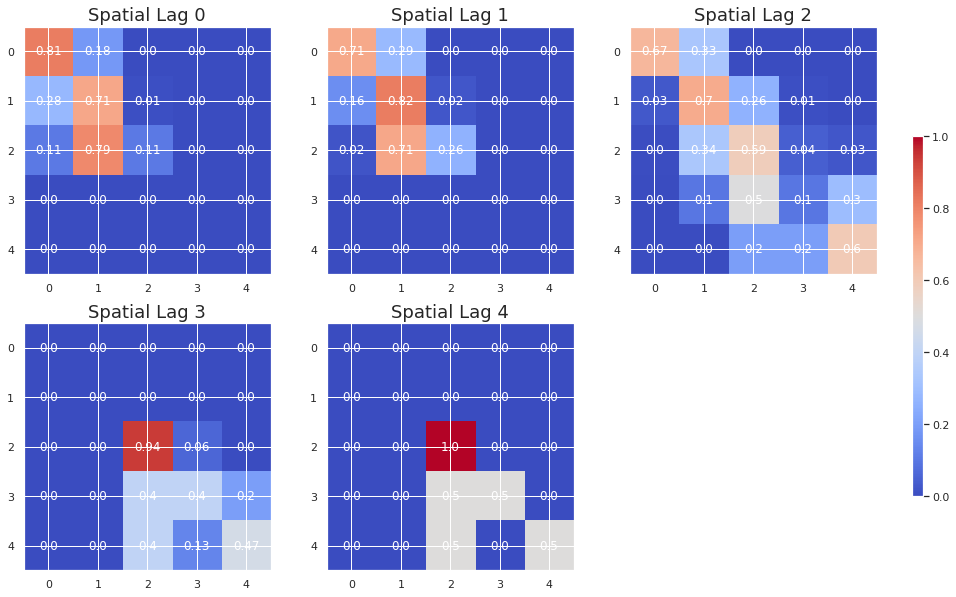

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (15,10)) 

for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if i==1 and j==2:
            ax.axis('off')
            continue
        # Loop over data dimensions and create text annotations.
        p_temp = sm.P[i*3+j]
        for x in range(len(p_temp)):
            for y in range(len(p_temp)):
                text = ax.text(y, x, round(p_temp[x, y], 2),
                               ha="center", va="center", color="w")
        im = ax.imshow(p_temp,cmap = "coolwarm",vmin=0, vmax=1)
        ax.set_title("Spatial Lag %d"%(i*3+j),fontsize=18) 
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.228, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)

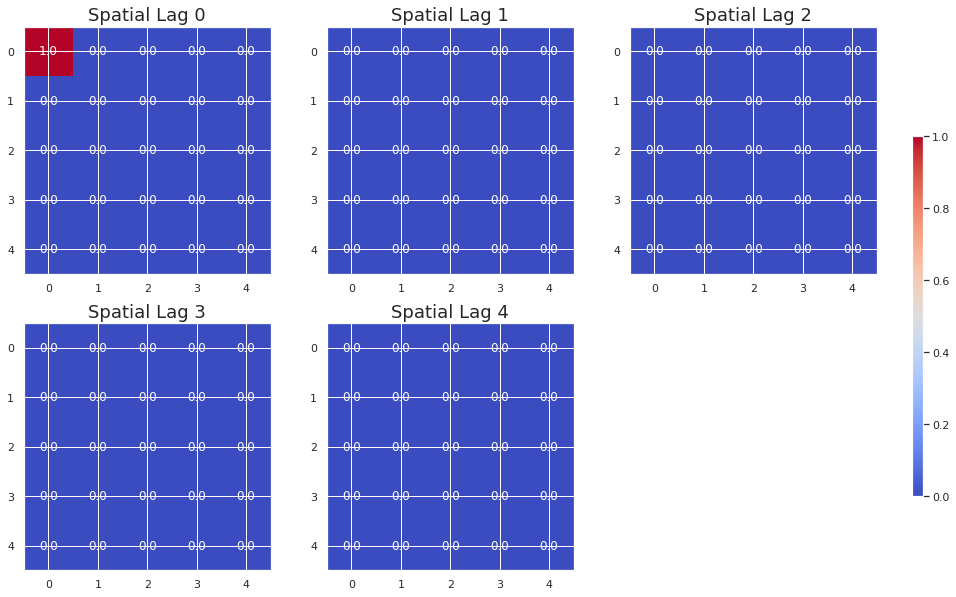

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (15,10)) 

for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if i==1 and j==2:
            ax.axis('off')
            continue
        # Loop over data dimensions and create text annotations.
        p_temp = sm.P[i*3+j]
        for x in range(len(p_temp)):
            for y in range(len(p_temp)):
                text = ax.text(y, x, round(p_temp[x, y], 2),
                               ha="center", va="center", color="w")
        im = ax.imshow(p_temp,cmap = "coolwarm",vmin=0, vmax=1)
        ax.set_title("Spatial Lag %d"%(i*3+j),fontsize=18) 
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.228, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)

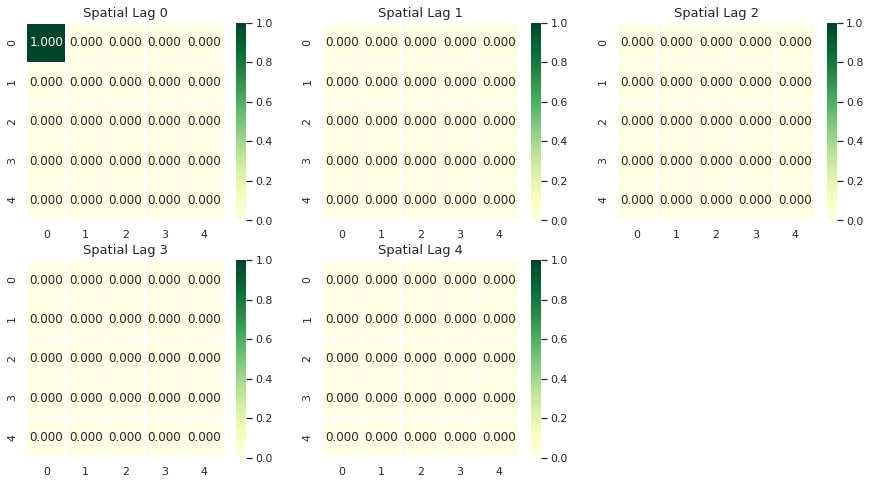

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (15,8)) 

for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if i==1 and j==2:
            ax.axis('off')
            continue
        p_temp = sm.P[i*3+j]
        im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
        ax.set_title("Spatial Lag %d"%(i*3+j),fontsize=13)

In [ ]:
print(sm.S)


[[5.98635823e-01 3.96168941e-01 5.19523593e-03 0.00000000e+00
  0.00000000e+00]
 [3.47200258e-01 6.30256810e-01 2.24992423e-02 4.36897579e-05
  0.00000000e+00]
 [4.61603085e-02 4.90352049e-01 3.78512259e-01 3.45123802e-02
  5.04630033e-02]
 [0.00000000e+00 0.00000000e+00 8.71794872e-01 9.32400932e-02
  3.49650350e-02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]]


In [ ]:
print(sm.F)


[[[1.67046468e+00 5.40094847e+00 2.17591822e+02 1.00000000e+00
   1.00000000e+00]
  [3.60513801e+00 2.52417567e+00 2.14035348e+02 1.00000000e+00
   1.00000000e+00]
  [4.29252145e+00 1.76811382e+00 1.92484040e+02 1.00000000e+00
   1.00000000e+00]
  [3.45054437e+00 5.24238700e+00 2.17052417e+02 1.00000000e+00
   1.00000000e+00]
  [3.45054437e+00 5.24238700e+00 2.17052417e+02 1.00000000e+00
   1.00000000e+00]]

 [[2.88018220e+00 3.44109794e+00 6.15172092e+01 2.28908631e+04
   1.00000000e+00]
  [6.43423474e+00 1.58665481e+00 5.86308747e+01 2.28879768e+04
   1.00000000e+00]
  [7.58268214e+00 1.46850005e+00 4.44459413e+01 2.28293459e+04
   1.00000000e+00]
  [6.22600951e+00 3.22784388e+00 6.03138467e+01 2.28886597e+04
   1.00000000e+00]
  [6.22600951e+00 3.22784388e+00 6.03138467e+01 2.28886597e+04
   1.00000000e+00]]

 [[2.16636334e+01 3.00000000e+00 7.09930716e+00 4.16929825e+01
   6.19681290e+01]
  [6.19909001e+01 2.03935112e+00 4.09930716e+00 3.86929825e+01
   5.89681290e+01]
  [6.4645843

In [ ]:
giddy.markov.Homogeneity_Results(sm.T).summary()


--------------------------------------------------
             Markov Homogeneity Test              
--------------------------------------------------
Number of classes: 5
Number of transitions: 40515
Number of regimes: 5
Regime names: 0, 1, 2, 3, 4
--------------------------------------------------
   Test                   LR                Chi-2
  Stat.              969.316             1355.926
    DOF                   36                   36
p-value                0.000                0.000
--------------------------------------------------
P(H0)        0        1        2        3        4
    0    0.783    0.215    0.002    0.000    0.000
    1    0.194    0.784    0.022    0.000    0.000
    2    0.020    0.591    0.366    0.015    0.008
    3    0.000    0.045    0.455    0.273    0.227
    4    0.000    0.000    0.364    0.136    0.500
--------------------------------------------------
P(0)         0        1        2        3        4
    0    0.814    0.184    0.002    0.

In [ ]:
giddy.markov.Homogeneity_Results(sm.T).summary()


--------------------------------------------------
             Markov Homogeneity Test              
--------------------------------------------------
Number of classes: 5
Number of transitions: 40515
Number of regimes: 5
Regime names: 0, 1, 2, 3, 4
--------------------------------------------------
   Test                   LR                Chi-2
  Stat.              969.316             1355.926
    DOF                   36                   36
p-value                0.000                0.000
--------------------------------------------------
P(H0)        0        1        2        3        4
    0    0.783    0.215    0.002    0.000    0.000
    1    0.194    0.784    0.022    0.000    0.000
    2    0.020    0.591    0.366    0.015    0.008
    3    0.000    0.045    0.455    0.273    0.227
    4    0.000    0.000    0.364    0.136    0.500
--------------------------------------------------
P(0)         0        1        2        3        4
    0    0.814    0.184    0.002    0.

In [ ]:
print(giddy.markov.kullback(sm.T))


{'Conditional homogeneity': 3910.515852995566, 'Conditional homogeneity dof': 80, 'Conditional homogeneity pvalue': 0.0}


In [ ]:
sm.S  # Steady state

array([[5.98635823e-01, 3.96168941e-01, 5.19523593e-03, 0.00000000e+00,
        0.00000000e+00],
       [3.47200258e-01, 6.30256810e-01, 2.24992423e-02, 4.36897579e-05,
        0.00000000e+00],
       [4.61603085e-02, 4.90352049e-01, 3.78512259e-01, 3.45123802e-02,
        5.04630033e-02],
       [0.00000000e+00, 0.00000000e+00, 8.71794872e-01, 9.32400932e-02,
        3.49650350e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [ ]:
print(sm.S)

In [ ]:
sm.x2_dof

80

In [ ]:
sm.x2_pvalue

0.0

In [ ]:
sm.x2

1355.9255422533522

In [ ]:
for f in sm.F:
    print (f) 

[[  1.67046468   5.40094847 217.59182212   1.           1.        ]
 [  3.60513801   2.52417567 214.03534768   1.           1.        ]
 [  4.29252145   1.76811382 192.48403983   1.           1.        ]
 [  3.45054437   5.242387   217.05241655   1.           1.        ]
 [  3.45054437   5.242387   217.05241655   1.           1.        ]]
[[2.88018220e+00 3.44109794e+00 6.15172092e+01 2.28908631e+04
  1.00000000e+00]
 [6.43423474e+00 1.58665481e+00 5.86308747e+01 2.28879768e+04
  1.00000000e+00]
 [7.58268214e+00 1.46850005e+00 4.44459413e+01 2.28293459e+04
  1.00000000e+00]
 [6.22600951e+00 3.22784388e+00 6.03138467e+01 2.28886597e+04
  1.00000000e+00]
 [6.22600951e+00 3.22784388e+00 6.03138467e+01 2.28886597e+04
  1.00000000e+00]]
[[21.66363338  3.          7.09930716 41.69298246 61.96812898]
 [61.99090015  2.03935112  4.09930716 38.69298246 58.96812898]
 [64.64584358  3.45995045  2.64192236 35.93201754 55.55530559]
 [66.62518446  5.33195706  2.87990762 28.97510965 38.5271841 ]
 [68.1

In [ ]:
# the estimated spatially lag conditioned transition probability matrices

for f in sm.P:
    print (f) 

[[0.81432782 0.18408524 0.00158694 0.         0.        ]
 [0.27915714 0.71153218 0.00931068 0.         0.        ]
 [0.10714286 0.78571429 0.10714286 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
[[0.70825853 0.28904847 0.002693   0.         0.        ]
 [0.15986069 0.81521442 0.02492488 0.         0.        ]
 [0.02330097 0.71456311 0.26019417 0.00194175 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
[[0.66666667 0.33333333 0.         0.         0.        ]
 [0.02803738 0.70093458 0.26168224 0.00934579 0.        ]
 [0.004329   0.33766234 0.58874459 0.04329004 0.02597403]
 [0.         0.1        0.5        0.1        0.3       ]
 [0.         0.         0.2        0.2        0.6       ]]
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.       

In [ ]:
for df in sm.F:
    print (df) 

[[  1.67046468   5.40094847 217.59182212   1.           1.        ]
 [  3.60513801   2.52417567 214.03534768   1.           1.        ]
 [  4.29252145   1.76811382 192.48403983   1.           1.        ]
 [  3.45054437   5.242387   217.05241655   1.           1.        ]
 [  3.45054437   5.242387   217.05241655   1.           1.        ]]
[[2.88018220e+00 3.44109794e+00 6.15172092e+01 2.28908631e+04
  1.00000000e+00]
 [6.43423474e+00 1.58665481e+00 5.86308747e+01 2.28879768e+04
  1.00000000e+00]
 [7.58268214e+00 1.46850005e+00 4.44459413e+01 2.28293459e+04
  1.00000000e+00]
 [6.22600951e+00 3.22784388e+00 6.03138467e+01 2.28886597e+04
  1.00000000e+00]
 [6.22600951e+00 3.22784388e+00 6.03138467e+01 2.28886597e+04
  1.00000000e+00]]
[[21.66363338  3.          7.09930716 41.69298246 61.96812898]
 [61.99090015  2.03935112  4.09930716 38.69298246 58.96812898]
 [64.64584358  3.45995045  2.64192236 35.93201754 55.55530559]
 [66.62518446  5.33195706  2.87990762 28.97510965 38.5271841 ]
 [68.1

In [ ]:
for df in sm.P:
    print (df) 

[[0.81432782 0.18408524 0.00158694 0.         0.        ]
 [0.27915714 0.71153218 0.00931068 0.         0.        ]
 [0.10714286 0.78571429 0.10714286 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
[[0.70825853 0.28904847 0.002693   0.         0.        ]
 [0.15986069 0.81521442 0.02492488 0.         0.        ]
 [0.02330097 0.71456311 0.26019417 0.00194175 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
[[0.66666667 0.33333333 0.         0.         0.        ]
 [0.02803738 0.70093458 0.26168224 0.00934579 0.        ]
 [0.004329   0.33766234 0.58874459 0.04329004 0.02597403]
 [0.         0.1        0.5        0.1        0.3       ]
 [0.         0.         0.2        0.2        0.6       ]]
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.       

In [ ]:
sm.summary()

In [ ]:
print(sm.transitions)

NameError: ignored

In [ ]:
sm.P    # spatial transition probability matrix
     

array([[[0.81432782, 0.18408524, 0.00158694, 0.        , 0.        ],
        [0.27915714, 0.71153218, 0.00931068, 0.        , 0.        ],
        [0.10714286, 0.78571429, 0.10714286, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.70825853, 0.28904847, 0.002693  , 0.        , 0.        ],
        [0.15986069, 0.81521442, 0.02492488, 0.        , 0.        ],
        [0.02330097, 0.71456311, 0.26019417, 0.00194175, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.66666667, 0.33333333, 0.        , 0.        , 0.        ],
        [0.02803738, 0.70093458, 0.26168224, 0.00934579, 0.        ],
        [0.004329  , 0.33766234, 0.58874459, 0.04329004, 0.02597403],
        [0.        , 0.1       , 0.5       , 0.1       , 0.3       ],
        [0.     

In [ ]:
print(sm.transitions)# The global transition probability matrix is estimated:


[[1.4723e+04 4.0470e+03 3.6000e+01 0.0000e+00 0.0000e+00]
 [4.0530e+03 1.6369e+04 4.5000e+02 1.0000e+00 0.0000e+00]
 [1.6000e+01 4.6800e+02 2.9000e+02 1.2000e+01 6.0000e+00]
 [0.0000e+00 1.0000e+00 1.0000e+01 6.0000e+00 5.0000e+00]
 [0.0000e+00 0.0000e+00 8.0000e+00 3.0000e+00 1.1000e+01]]


In [ ]:
sm.p # The global transition probability matrix is estimated:
print(sm.p)

[[7.82888440e-01 2.15197277e-01 1.91428268e-03 0.00000000e+00
  0.00000000e+00]
 [1.94174292e-01 7.84218847e-01 2.15589518e-02 4.79087817e-05
  0.00000000e+00]
 [2.02020202e-02 5.90909091e-01 3.66161616e-01 1.51515152e-02
  7.57575758e-03]
 [0.00000000e+00 4.54545455e-02 4.54545455e-01 2.72727273e-01
  2.27272727e-01]
 [0.00000000e+00 0.00000000e+00 3.63636364e-01 1.36363636e-01
  5.00000000e-01]]


In [ ]:
# The Q and likelihood ratio statistics are both significant indicating
# the dynamics are not homogeneous across the lag classes:
    
"%.3f"%sm.LR

'969.316'

In [ ]:
 "%.3f"%sm.Q

'1355.926'

In [ ]:
 "%.3f"%sm.LR_p_value


'0.000'

In [ ]:

sm.dof_hom


36

In [ ]:
sm.S   ## long run of SMC

array([[5.98635823e-01, 3.96168941e-01, 5.19523593e-03, 0.00000000e+00,
        0.00000000e+00],
       [3.47200258e-01, 6.30256810e-01, 2.24992423e-02, 4.36897579e-05,
        0.00000000e+00],
       [4.61603085e-02, 4.90352049e-01, 3.78512259e-01, 3.45123802e-02,
        5.04630033e-02],
       [0.00000000e+00, 0.00000000e+00, 8.71794872e-01, 9.32400932e-02,
        3.49650350e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [ ]:
sm.s # steady state of global

array([0.46328641, 0.51596837, 0.01965356, 0.00054579, 0.00054587])

In [ ]:
1/sm.s   # mean return timr of global

array([   2.15849198,    1.93810329,   50.8813654 , 1832.21184974,
       1831.94852978])

In [ ]:
print(giddy.ergodic.fmpt(sm.p))  ###  mean first passage time of global


[[2.15849198e+00 4.62243217e+00 8.51421924e+01 2.82618992e+03
  4.08378456e+03]
 [5.32231739e+00 1.93810329e+00 8.12526739e+01 2.82225051e+03
  4.07987236e+03]
 [6.86615670e+00 1.87195975e+00 5.08813654e+01 2.74665675e+03
  4.00119155e+03]
 [8.94701240e+00 3.93039728e+00 7.73776033e+00 1.83221185e+03
  2.75711174e+03]
 [9.43366280e+00 4.43335180e+00 4.11029827e+00 1.99956854e+03
  1.83194853e+03]]


In [ ]:
print(sm.S) # steady state of SMC

[[5.98635823e-01 3.96168941e-01 5.19523593e-03 0.00000000e+00
  0.00000000e+00]
 [3.47200258e-01 6.30256810e-01 2.24992423e-02 4.36897579e-05
  0.00000000e+00]
 [4.61603085e-02 4.90352049e-01 3.78512259e-01 3.45123802e-02
  5.04630033e-02]
 [0.00000000e+00 0.00000000e+00 8.71794872e-01 9.32400932e-02
  3.49650350e-02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]]


In [ ]:
np.matrix(sm.chi2)

matrix([[4.06850309e+02, 0.00000000e+00, 8.00000000e+00],
        [3.36889387e+02, 0.00000000e+00, 8.00000000e+00],
        [5.79902403e+02, 0.00000000e+00, 1.60000000e+01],
        [2.92440748e+01, 2.87291447e-04, 8.00000000e+00],
        [3.03936782e+00, 9.31862743e-01, 8.00000000e+00]])

In [ ]:
#pip install -U giddy
import giddy
import numpy as np
cc=np.array([50,100,200,300]) #set the classification cutoffs, we will pass it to Spatial_Markov later
sm = giddy.markov.Spatial_Markov(y,w,cutoff=cc,lag_cutoff=cc) #you need to define "y" as your air pollution index data and "w" as the spatial weight matrix
sm.P #this is the 5 spatial Markov transition probability matrices
sm.p #this is the classic transition probability matrix

In [ ]:
np.matrix(sm.shtest)   #

matrix([[1.53292285e+03, 0.00000000e+00, 4.00000000e+00],
        [1.15715166e+03, 0.00000000e+00, 4.00000000e+00],
        [4.84441143e+03, 0.00000000e+00, 4.00000000e+00],
        [2.34526147e+03, 0.00000000e+00, 4.00000000e+00],
        [2.49406827e+02, 0.00000000e+00, 4.00000000e+00]])

In [ ]:
from scipy.stats import chi2
chi2(T1,T2)

In [ ]:
from scipy.stats import chisquare

chisquare(T1,T2)

In [ ]:
import csv
with open("Last37API.csv", "rb") as f:
  reader = csv.reader(f)

In [ ]:
import pandas
f = pandas.read_csv('Last37API.csv', index_col='Name')
#print(f)
f.head()

In [ ]:
#Classic Markov

import pysal
import numpy as np
#f = pysal.open("C:\\Users\\Yousif\\Desktop\\Spatial.MC\\updated_testdata17.csv")
#df = pd.read_csv("Last37API.csv")
pci = np.array([f.by_col[str(y)] for y in range(1,1096)])
#pci = df[list(map(str,range(1, 1096)))].as_matrix()

#set classes to quintiles for each year

q5 = np.array([pysal.Quantiles(y).yb for y in pci]).transpose()
m = pysal.Markov(q5)
m.transitions



In [ ]:
print(y)   #API data

[[50. 40. 44. ... 30. 32. 41.]
 [43. 51. 55. ... 53. 51. 51.]
 [37. 47. 63. ... 27. 52. 57.]
 ...
 [47. 66. 37. ... 29. 36. 52.]
 [36. 50. 54. ... 19. 20. 23.]
 [44. 55. 52. ... 32. 39. 67.]]


In [ ]:
len(y)  # number of rows or number of stations

37

In [ ]:
#Classic Markov
import pysal
import pandas as pd
f = pysal.open("C:\\Users\\y85al\\OneDrive\\Desktop\\Last37API.csv")
#f = pysal.open("C:\Users\y85al\OneDrive\Desktop\Last37API.csv")

#df = pd.read_csv("Last37API.csv")
#pci = df[list(map(str,range(1, 1097)))].values
pci = np.array([df.by_col[str(y)] for y in range(1,1096)])
#set classes to quintiles for each year
q5 = np.array([pysal.Quantiles(y).yb for y in pci]).transpose()
m = pysal.Markov(q5)
m.transitions



In [ ]:
import csv
 
f  = open('Last37API.csv', "rb")
reader = csv.reader(f)
of  = open('Last37API.csv', "wb")

In [ ]:
w = ps.io.open("37_weight.gal").read()
w.transform = 'r'
w.neighbors

In [ ]:
m.p

In [ ]:
m.steady_state

In [ ]:
 pysal.ergodic.fmpt(m.p)

In [ ]:
import pysal as ps
import pandas as pd
import numpy as np
f = ps.open("D:\\Last37API.csv")
print(f)

AttributeError: ignored

In [ ]:
import pysal
import pandas as pd
import numpy as np

f = pd.read_csv("C:\\Users\\y85al\\Downloads\\Last37API.csv")
pci = np.array([f.by_col[str(y)] for y in range(1,1096)])
#set classes to quintiles for each year
q5 = np.array([pysal.Quantiles(y).yb for y in pci]).transpose()
m = pysal.Markov(q5)
m.transitions

In [ ]:
Directional Analysis of Dynamic LISAs¶
This notebook demonstrates how to use Rose diagram based inference for directional LISAs.

In [ ]:
import libpysal 
import numpy as np
from giddy.directional import Rose
%matplotlib inline

In [ ]:
f = open(libpysal.examples.get_path('spi_download.csv'), 'r')
lines = f.readlines()
f.close()

In [ ]:
f

<_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/libpysal/examples/us_income/spi_download.csv' mode='r' encoding='UTF-8'>